# Deep learning on Bank Note Authentication dataset. 

*Let's start by importing some basic libraries as follows.*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow_addons as tfa
import keras

*Reading the data as follows.*

In [2]:
data = pd.read_csv('BankNote_Authentication.csv')

- Conducting basic inspection of the data.

In [3]:
data.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [54]:
data.shape

(1372, 5)

In [4]:
np.unique(data['class'])

array([0, 1], dtype=int64)

In [5]:
data['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

In [6]:
data.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

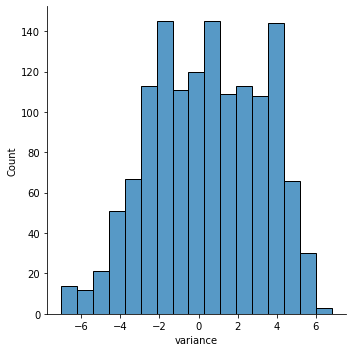

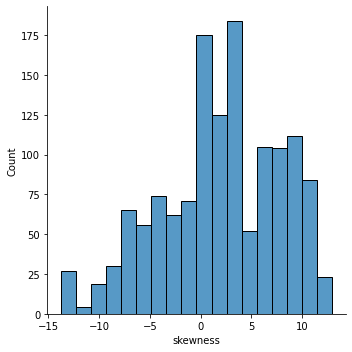

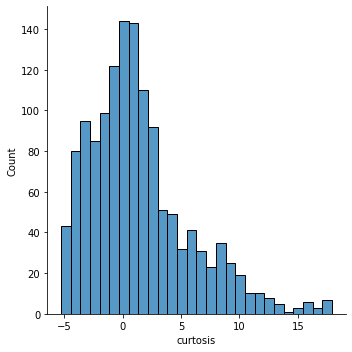

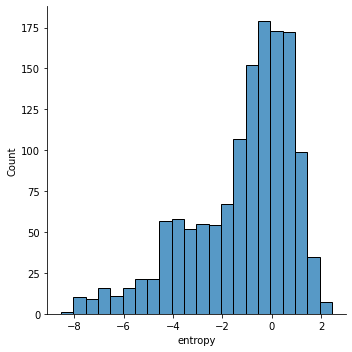

In [93]:
for i in data.columns[:-1]:
    sns.displot(data[i])
    plt.show()

E:\ANACONDA LATEST\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


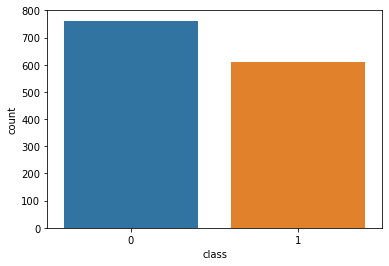

In [96]:
sns.countplot(data['class'])
plt.show()

- No imbalance as such.

In [7]:
X = data.iloc[:, :4]
y = data['class']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [9]:
from keras.layers import Input, Dense
from keras import Model

In [10]:
input_layer = Input(shape = 4)
d_1 = Dense(units = 8, activation = 'relu', )(input_layer)
d_2 = Dense(units = 16, activation = 'relu')(d_1)
output_layer = Dense(units = 1, activation = 'sigmoid')(d_2)

model = Model(inputs = input_layer, outputs = output_layer)

In [11]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense (Dense)                (None, 8)                 40        
_________________________________________________________________
dense_1 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
performance = model.fit(x = X_train, y = y_train, batch_size = 8, epochs = 10, validation_data = (X_test, y_test))

Epoch 1/10
138/138 [==============================] - 2s 9ms/step - loss: 0.5719 - accuracy: 0.6978 - val_loss: 0.3319 - val_accuracy: 0.8800
Epoch 2/10
138/138 [==============================] - 0s 1ms/step - loss: 0.2809 - accuracy: 0.9033 - val_loss: 0.1893 - val_accuracy: 0.9382
Epoch 3/10
138/138 [==============================] - 0s 1ms/step - loss: 0.1555 - accuracy: 0.9546 - val_loss: 0.1326 - val_accuracy: 0.9455
Epoch 4/10
138/138 [==============================] - 0s 1ms/step - loss: 0.0952 - accuracy: 0.9741 - val_loss: 0.0855 - val_accuracy: 0.9636
Epoch 5/10
138/138 [==============================] - 0s 1ms/step - loss: 0.0731 - accuracy: 0.9794 - val_loss: 0.0633 - val_accuracy: 0.9709
Epoch 6/10
138/138 [==============================] - 0s 1ms/step - loss: 0.0514 - accuracy: 0.9887 - val_loss: 0.0443 - val_accuracy: 0.9818
Epoch 7/10
138/138 [==============================] - 0s 1ms/step - loss: 0.0364 - accuracy: 0.9898 - val_loss: 0.0325 - val_accuracy: 0.9891
Epoch 

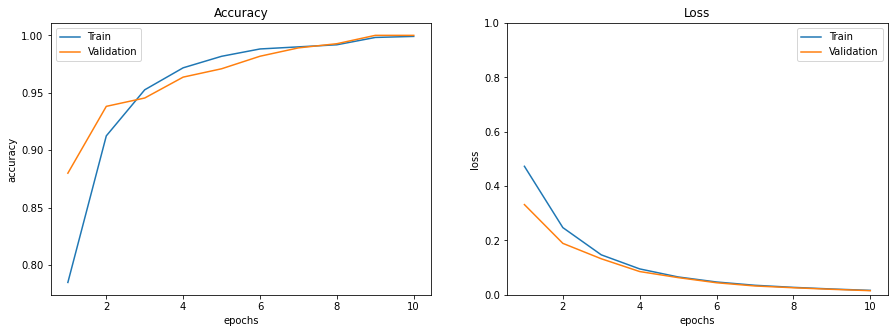

In [57]:
plt.figure(figsize = (15, 5))
plt.subplot(121)
sns.lineplot(x = range(1,11), y = performance.history['accuracy'])
sns.lineplot(x = range(1,11), y = performance.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Accuracy')
plt.legend(['Train', 'Validation'])

plt.subplot(122)
plt.ylim((0, 1))
sns.lineplot(x = range(1,11), y = performance.history['loss'])
sns.lineplot(x = range(1,11), y = performance.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

In [58]:
pred_val_data = model.predict(X_test).reshape(275,)

In [59]:
pred_val_data = pd.DataFrame(pred_val_data, columns=['predictions'])
pred_val_data['predictions'] = pred_val_data['predictions'].apply(lambda x : 1 if x>=0.5 else 0)

In [60]:
pred_val_data['predictions'].value_counts()

0    157
1    118
Name: predictions, dtype: int64

E:\ANACONDA LATEST\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


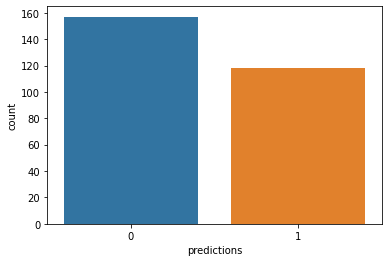

In [99]:
sns.countplot(pred_val_data['predictions'])
plt.show()

*Let's now analyze a few metrics as follows.*

In [61]:
from sklearn.metrics import f1_score, confusion_matrix

In [62]:
f1_score(y_test, pred_val_data['predictions'])

1.0

In [89]:
confusion_matrix(y_test, pred_val_data)

array([[157,   0],
       [  0, 118]], dtype=int64)

## Some points

- f1 score and more so confusion matrix clearly shows that only *True Positives* and *True Negatives* are obtained. There has been no misclassification.
- Even though, the performance is perfect on the test data given but its because of the fact that both the train as well as validation data comes from the same distribution. However, if the future/unseen data is from a different distribution then the model may or may not work that well.
- This problem is too simple for Deep Learning as the DL model used is very simple and even then the results obtained are perfect, indicating that simpler algorithms pertaining to classical machine learning algorithms may prove to be sufficient for the problem at hand.